In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.express as px
import scipy.stats as sp

Есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема - к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены доставка очень сильно проседает в эффективности. 
Data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома.
Проведем A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Проанализируем данные эксперимента, чтобы принять решение о раскатке новой фичи на всех курьеров.

Сформулирую гипотезы:
Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

In [5]:
#импортирую датафрейи
ab_test=pd.read_csv('experiment_lesson_4.csv')

In [6]:
ab_test.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

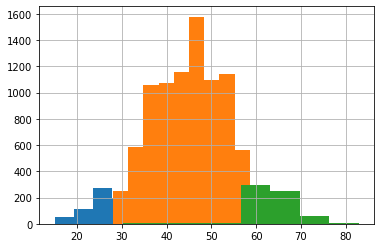

In [30]:
#Построю графики распределения для каждой из групп в разбивке по районам. График для контрольной группы.
ab_test.query("experiment_group =='control'").groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

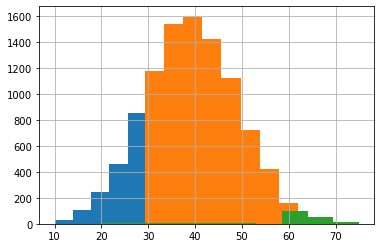

In [31]:
#Построю графики распределения для каждой из групп в разбивке по районам. График для тестовой группы.
ab_test.query("experiment_group =='test'").groupby('district').delivery_time.hist()

Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.
Для того, чтобы проверить нормальность распределения, я использую тест Шапиро-Уилка.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


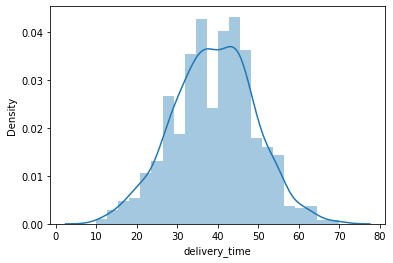

In [32]:
test=ab_test[ab_test['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)
sns.distplot(test)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


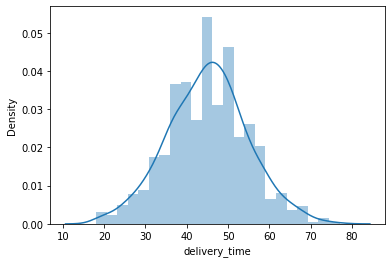

In [33]:
control=ab_test[ab_test['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)
sns.distplot(control)

In [ ]:
Этот тест показывает, что значения в обеих группах распределены нормально.

In [34]:
#Стандартное отклонение времени доставки в контроле равно
control = ab_test.query("experiment_group =='control'")
control.delivery_time.std().round(2)

9.99

In [35]:
#Стандартное отклонение времени доставки в тесте равно 
test = ab_test.query("experiment_group =='test'")
test.delivery_time.std().round(2)

9.99

Сравним средние значения через Т-тест, критерий Стьюдента.

In [48]:
test = ab_test.query("experiment_group =='test'").delivery_time
control = ab_test.query("experiment_group =='control'").delivery_time

In [49]:
sp.ttest_ind(test,control)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

Статистика в тесте равна -43, p-value < 0.05, следовательно, разница средних значений в двух группах имеется (отвергаем H0). Если посчитать среднее значение в каждой группе, можно обнаружить, что среднее время доставки в тестовой группе меньше, чем в контрольной, что позволяет сделать нам вывод раскатать новую фичу на всех курьеров. 